<a href="https://colab.research.google.com/github/yunha91/analysis/blob/master/kagglestarbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
df01=pd.read_csv('/content/gdrive/My Drive/data/archive (1)/Starbucks satisfactory survey.csv', parse_dates=['Timestamp'])
df02=pd.read_csv('/content/gdrive/My Drive/data/archive (1)/Starbucks satisfactory survey encode cleaned.csv')

In [14]:
df01.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019-10-01 12:38:43-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019-10-01 12:38:54-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019-10-01 12:38:56-08:00,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019-10-01 12:39:08-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019-10-01 12:39:20-08:00,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [15]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype                                 
---  ------                                                                                                                  --------------  -----                                 
 0   Timestamp                                                                                                               122 non-null    datetime64[ns, pytz.FixedOffset(-480)]
 1   1. Your Gender                                                                                                          122 non-null    object                                
 2   2. Your Age                                                                                                             122 non-null    object                            

In [16]:
df01.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Starbucks?',
       '6. How do you usually enjoy Starbucks?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Starbucks's outlet to you is...?',
       '9. Do you have Starbucks membership card?',
       '10. What do you most frequently purchase at Starbucks?',
       '11. On average, how much would you spend at Starbucks per visit?',
       '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Starbucks?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Starbucks as..',
       '17. How would you rate the service at 

## 스타벅스를 자주오는 사람들의 특징은? 

In [61]:
df01.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Starbucks?',
       '6. How do you usually enjoy Starbucks?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Starbucks's outlet to you is...?',
       '9. Do you have Starbucks membership card?',
       '10. What do you most frequently purchase at Starbucks?',
       '11. On average, how much would you spend at Starbucks per visit?',
       '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Starbucks?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Starbucks as..',
       '17. How would you rate the service at 

## 스타벅스 방문 목적, 빈도수 등 성별에 따른 분류

In [89]:
df01.iloc[:,2:3].value_counts()

2. Your Age  
From 20 to 29    85
From 30 to 39    17
Below 20         13
40 and above      7
dtype: int64

In [111]:
Female = df01[df01['1. Your Gender']=='Female']
Male = df01[df01['1. Your Gender']=='Male']

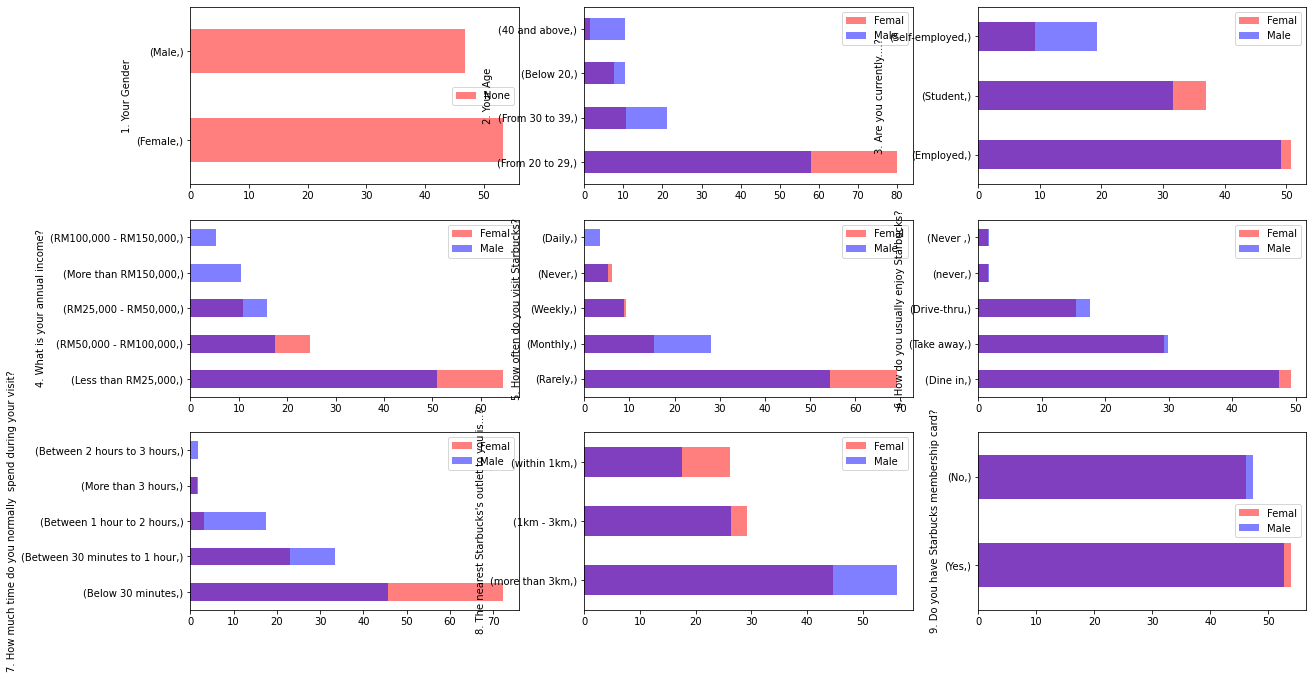

In [178]:
plt.figure(figsize=(20,15))
plt.tight_layout()

plt.subplot(431)
(df01.iloc[:,1:2].value_counts()/122*100).plot(kind='barh', color='red', alpha=0.5)
plt.legend()
plt.subplot(432)
(Female.iloc[:,2:3].value_counts()/65*100).plot(kind='barh', color='red', alpha=0.5, label='Femal')
(Male.iloc[:,2:3].value_counts()/57*100).plot(kind='barh', color='blue', alpha=0.5, label='Male')
plt.legend()
plt.subplot(433)
(Female.iloc[:,3:4].value_counts()/65*100).plot(kind='barh', color='red', alpha=0.5, label='Femal')
(Male.iloc[:,3:4].value_counts()/57*100).plot(kind='barh', color='blue', alpha=0.5, label='Male')
plt.legend()
plt.subplot(434)
(Female.iloc[:,4:5].value_counts()/65*100).plot(kind='barh', color='red', alpha=0.5, label='Femal')
(Male.iloc[:,4:5].value_counts()/57*100).plot(kind='barh', color='blue', alpha=0.5, label='Male')
plt.legend()
plt.subplot(435)
(Female.iloc[:,5:6].value_counts()/65*100).plot(kind='barh', color='red', alpha=0.5, label='Femal')
(Male.iloc[:,5:6].value_counts()/57*100).plot(kind='barh', color='blue', alpha=0.5, label='Male')
plt.legend()
plt.subplot(436)
(Female.iloc[:,6:7].value_counts()/65*100).plot(kind='barh', color='red', alpha=0.5, label='Femal')
(Male.iloc[:,6:7].value_counts()/57*100).plot(kind='barh', color='blue', alpha=0.5, label='Male')
plt.legend()
plt.subplot(437)
(Female.iloc[:,7:8].value_counts()/65*100).plot(kind='barh', color='red', alpha=0.5, label='Femal')
(Male.iloc[:,7:8].value_counts()/57*100).plot(kind='barh', color='blue', alpha=0.5, label='Male')
plt.legend()
plt.subplot(438)
(Female.iloc[:,8:9].value_counts()/65*100).plot(kind='barh', color='red', alpha=0.5, label='Femal')
(Male.iloc[:,8:9].value_counts()/57*100).plot(kind='barh', color='blue', alpha=0.5, label='Male')
plt.legend()
plt.subplot(439)
(Female.iloc[:,9:10].value_counts()/65*100).plot(kind='barh', color='red', alpha=0.5, label='Femal')
(Male.iloc[:,9:10].value_counts()/57*100).plot(kind='barh', color='blue', alpha=0.5, label='Male')
plt.legend()

plt.legend()

### 가장 많이 방문하는 시간대는 ? 

Text(0.5, 1.0, 'timestamp density')

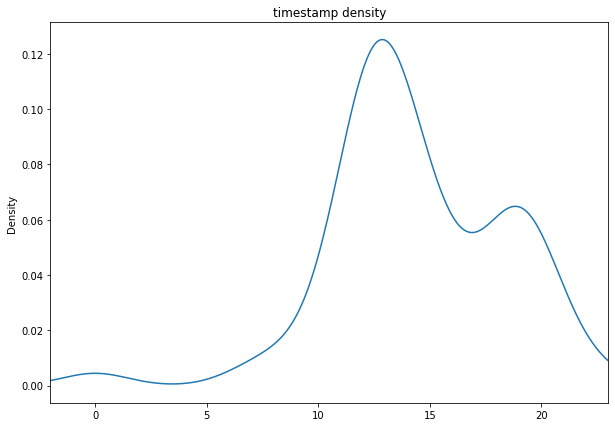

In [176]:
df01['Timestamp'].dt.hour.plot(kind='kde', figsize=(10,7))
plt.xlim(-2,23)
plt.title('timestamp density')

In [193]:
df01['hour']=df01['Timestamp'].dt.hour
time_list = [12,13,14]
picktime = df01[df01['hour'].isin(time_list)]

In [195]:
len(picktime)

55

Text(0.5, 1.0, 'How often do you visit Starbucks?')

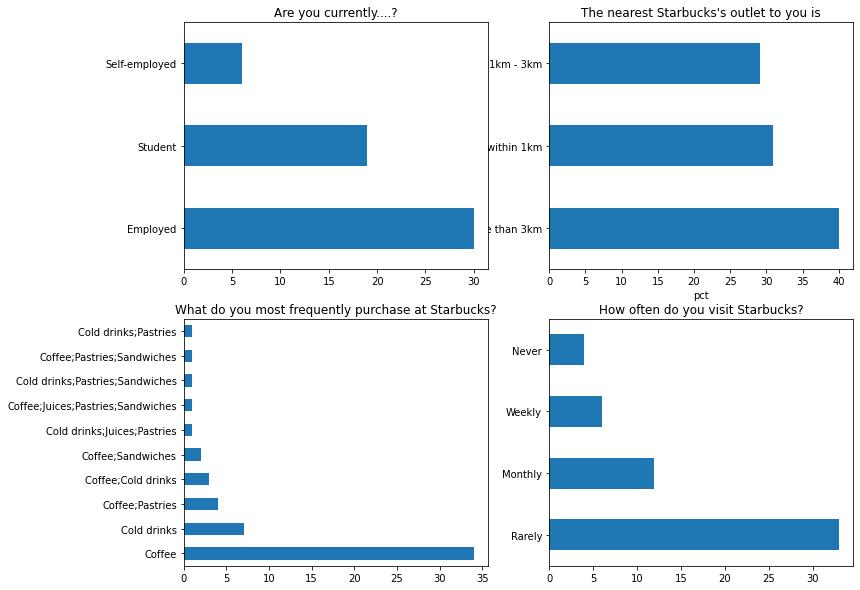

In [206]:
plt.figure(figsize=(12,10))
plt.subplot(222)
(picktime["8. The nearest Starbucks's outlet to you is...?"].value_counts()/55*100).plot(kind='barh')
plt.title("The nearest Starbucks's outlet to you is")
plt.xlabel('pct')

plt.subplot(221)
picktime["3. Are you currently....?"].value_counts().plot(kind='barh')
plt.title("Are you currently....?")

plt.subplot(223)
picktime["10. What do you most frequently purchase at Starbucks?"].value_counts().plot(kind='barh')
plt.title("What do you most frequently purchase at Starbucks?")

plt.subplot(224)
picktime["5. How often do you visit Starbucks?"].value_counts().plot(kind='barh')
plt.title("How often do you visit Starbucks?")



### 스타벅스 분석 궁금증 1 : 3km이상 스타벅스를 찾아오는 사람들은 ? 

Text(0.5, 1.0, 'How do you usually enjoy Starbucks?')

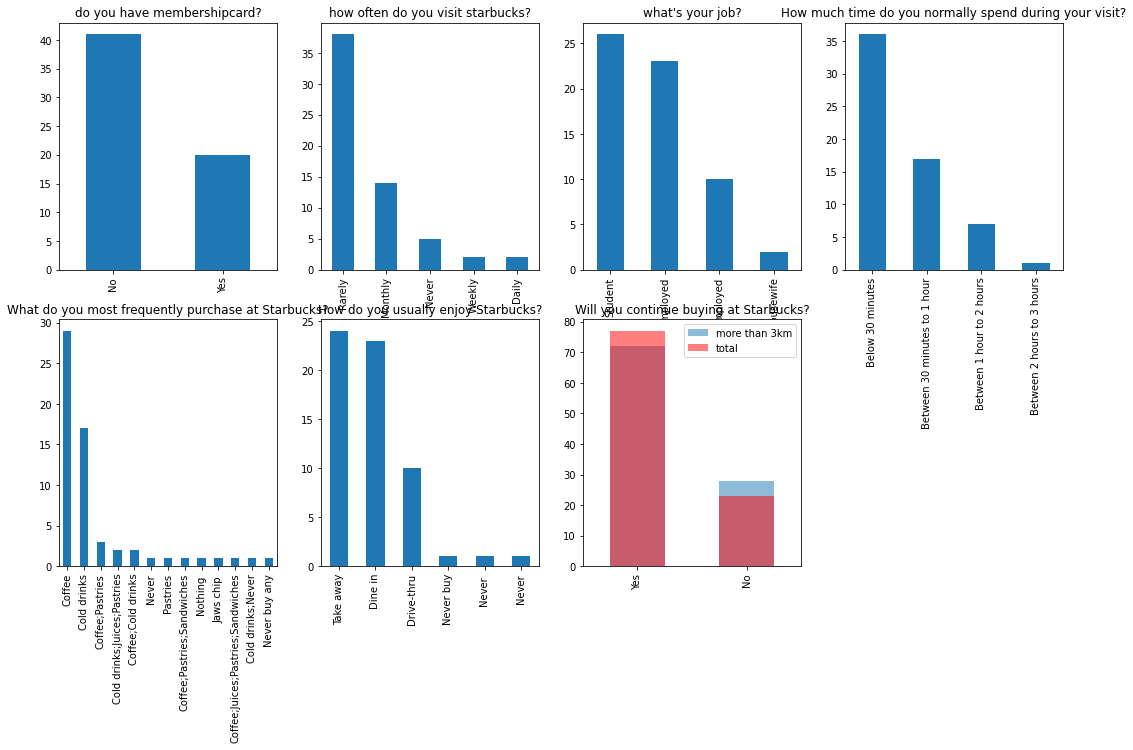

In [190]:
plt.figure(figsize=(18,10))
plt.tight_layout()
plt.subplot(241)
df01.loc[df01["8. The nearest Starbucks's outlet to you is...?"]=='more than 3km']['9. Do you have Starbucks membership card?'].value_counts().plot(kind='bar')
plt.title('do you have membershipcard?')

plt.subplot(242)
df01.loc[df01["8. The nearest Starbucks's outlet to you is...?"]=='more than 3km']['5. How often do you visit Starbucks?'].value_counts().plot(kind='bar')
plt.title('how often do you visit starbucks?')

plt.subplot(243)
df01.loc[df01["8. The nearest Starbucks's outlet to you is...?"]=='more than 3km']['3. Are you currently....?'].value_counts().plot(kind='bar')
plt.title("what's your job?")

plt.subplot(244)
df01.loc[df01["8. The nearest Starbucks's outlet to you is...?"]=='more than 3km']['7. How much time do you normally  spend during your visit?'].value_counts().plot(kind='bar')
plt.title("How much time do you normally spend during your visit?")

plt.subplot(245)
df01.loc[df01["8. The nearest Starbucks's outlet to you is...?"]=='more than 3km']['10. What do you most frequently purchase at Starbucks?'].value_counts().plot(kind='bar')
plt.title("What do you most frequently purchase at Starbucks?")

plt.subplot(247)
(df01.loc[df01["8. The nearest Starbucks's outlet to you is...?"]=='more than 3km']['20. Will you continue buying at Starbucks?'].value_counts()/61*100).plot(kind='bar', alpha=0.5, label='more than 3km')
(df01['20. Will you continue buying at Starbucks?'].value_counts()/122*100).plot(kind='bar', color='red',alpha=0.5, label='total')
plt.title("Will you continue buying at Starbucks?")
plt.legend()

plt.subplot(246)
df01.loc[df01["8. The nearest Starbucks's outlet to you is...?"]=='more than 3km']['6. How do you usually enjoy Starbucks?'].value_counts().plot(kind='bar')
plt.title("How do you usually enjoy Starbucks?")


## 재방문여부로 나눠보는 평가점수

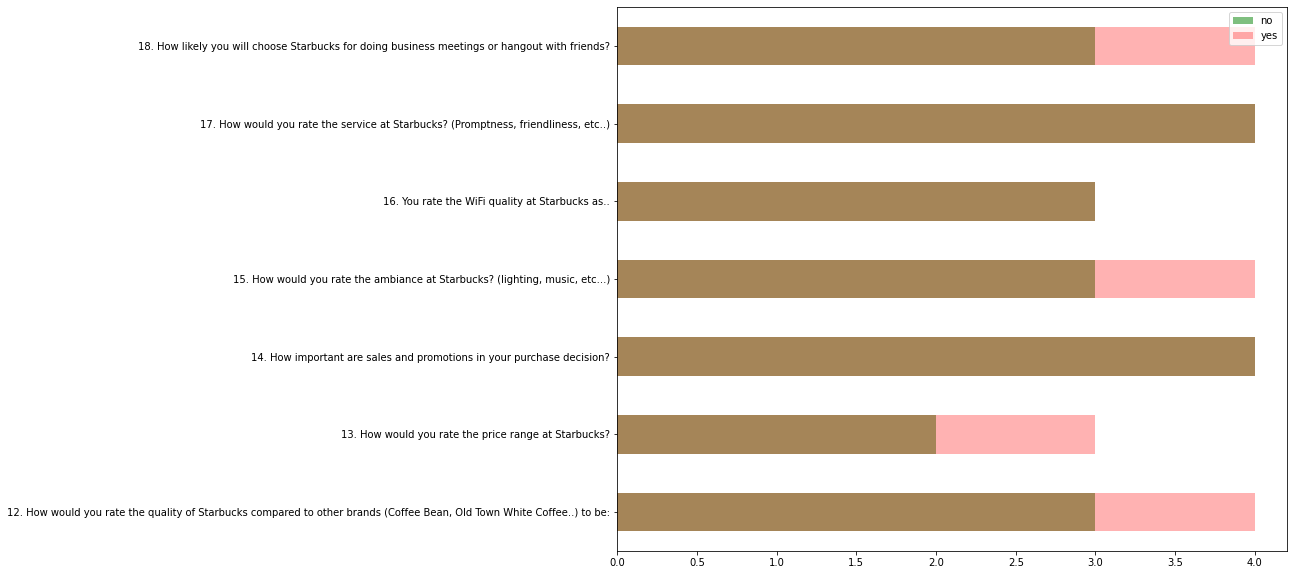

In [225]:
no_group = df01[df01['20. Will you continue buying at Starbucks?']=='No']
yes_group = df01[df01['20. Will you continue buying at Starbucks?']=='Yes']
no_group.iloc[:,12:19].median().plot(kind='barh', figsize=(12,10), alpha=0.5, color='green', label='no')
yes_group.iloc[:,12:19].median().plot(kind='barh', figsize=(12,10), alpha=0.3, color='red', label='yes')
plt.legend()

In [26]:
rate=df01.iloc[:,12:18]
rate.columns=['quality','price','promotion','ambiance','wifi','service']

In [27]:
rate.head()

,quality,price,promotion,ambiance,wifi,service
0,4,3,5,5,4,4
1,4,3,4,4,4,5
2,4,3,4,4,4,4
3,2,1,4,3,3,3
4,3,3,4,2,2,3


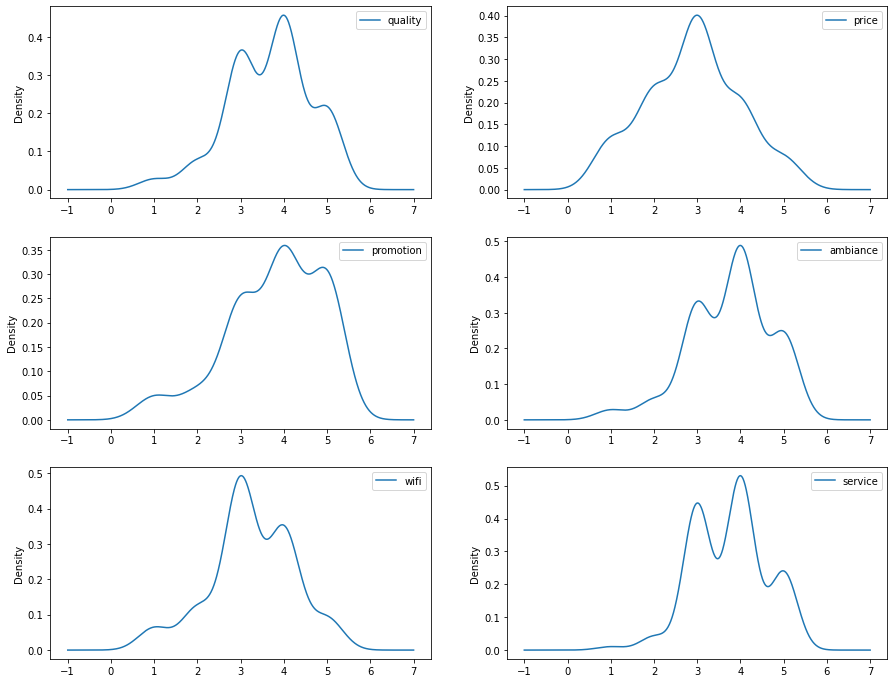

In [34]:
plt.figure(figsize=(15,12))

plt.subplot(321)
rate['quality'].plot(kind='kde', label='quality')
plt.legend()
plt.subplot(322)
rate['price'].plot(kind='kde', label='price')
plt.legend()
plt.subplot(323)
rate['promotion'].plot(kind='kde', label='promotion')
plt.legend()
plt.subplot(324)
rate['ambiance'].plot(kind='kde', label='ambiance')
plt.legend()
plt.subplot(325)
rate['wifi'].plot(kind='kde', label='wifi')
plt.legend()
plt.subplot(326)
rate['service'].plot(kind='kde', label='service')
plt.legend()


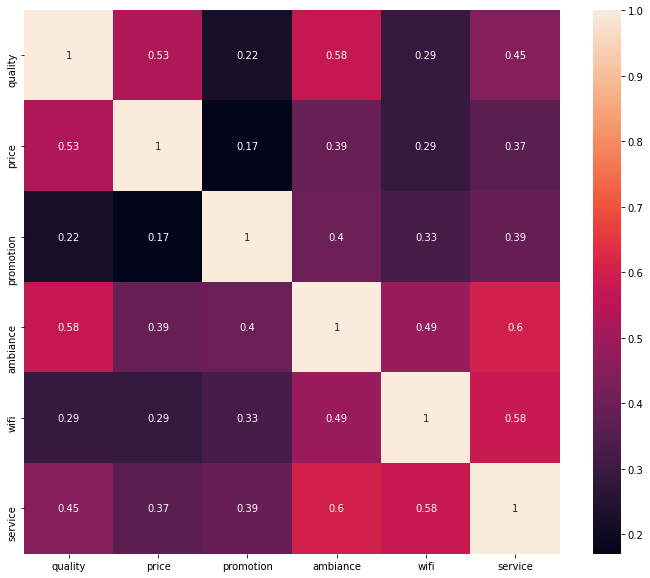

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(rate.corr(), annot=True)

In [48]:
rate['service'].value_counts()

4    51
3    43
5    23
2     4
1     1
Name: service, dtype: int64

Text(0.5, 0, 'ambiance rate')

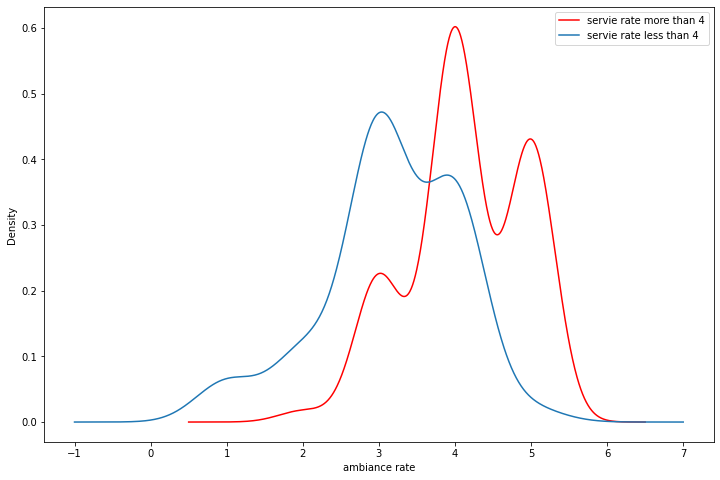

In [60]:
plt.figure(figsize=(12,8))
rate[rate['service']>=4]['ambiance'].plot(kind='kde', label='servie rate more than 4', color='red')
rate[rate['service']<4]['ambiance'].plot(kind='kde', label='servie rate less than 4')
plt.legend()
plt.xlabel('ambiance rate')

### 서비스에 대한 평가와 전반적인 분위기에 대한 평가가 관계가 있음을 추측해볼 수 있다. 서비스에 대해 만족도가 높은 고객들이 분위기에 대한 점수도 높은 편이다 

In [265]:
rate=df01.iloc[:,12:18]
rate.columns=['quality','price','promotion','ambiance','wifi','service']
rate['backagain']=df01.iloc[:,20:21]
rate.head()

,quality,price,promotion,ambiance,wifi,service,backagain
0,4,3,5,5,4,4,Yes
1,4,3,4,4,4,5,Yes
2,4,3,4,4,4,4,Yes
3,2,1,4,3,3,3,No
4,3,3,4,2,2,3,Yes


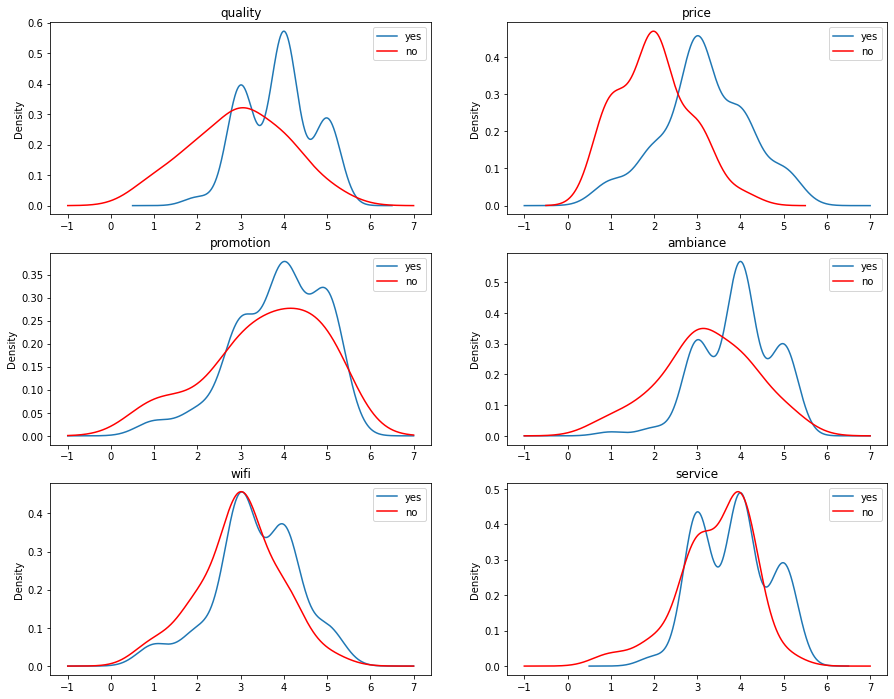

In [229]:
lt.figure(figsize=(15,12))

plt.subplot(321)
rate[rate['backagain']=='Yes']['quality'].plot(kind='kde', label='yes')
rate[rate['backagain']=='No']['quality'].plot(kind='kde', label='no', color='red')
plt.title('quality')
plt.legend()
plt.subplot(322)
rate[rate['backagain']=='Yes']['price'].plot(kind='kde', label='yes')
rate[rate['backagain']=='No']['price'].plot(kind='kde', label='no', color='red')
plt.legend()
plt.title('price')
plt.subplot(323)
rate[rate['backagain']=='Yes']['promotion'].plot(kind='kde', label='yes')
rate[rate['backagain']=='No']['promotion'].plot(kind='kde', label='no', color='red')
plt.title('promotion')
plt.legend()
plt.subplot(324)
rate[rate['backagain']=='Yes']['ambiance'].plot(kind='kde', label='yes')
rate[rate['backagain']=='No']['ambiance'].plot(kind='kde', label='no', color='red')
plt.title('ambiance')
plt.legend()
plt.subplot(325)
rate[rate['backagain']=='Yes']['wifi'].plot(kind='kde', label='yes')
rate[rate['backagain']=='No']['wifi'].plot(kind='kde', label='no', color='red')
plt.title('wifi')
plt.legend()
plt.subplot(326)
rate[rate['backagain']=='Yes']['service'].plot(kind='kde', label='yes')
rate[rate['backagain']=='No']['service'].plot(kind='kde', label='no', color='red')
plt.title('service')
plt.legend()


In [268]:
rate.head()

,quality,price,promotion,ambiance,wifi,service,backagain
0,4,3,5,5,4,4,Yes
1,4,3,4,4,4,5,Yes
2,4,3,4,4,4,4,Yes
3,2,1,4,3,3,3,No
4,3,3,4,2,2,3,Yes


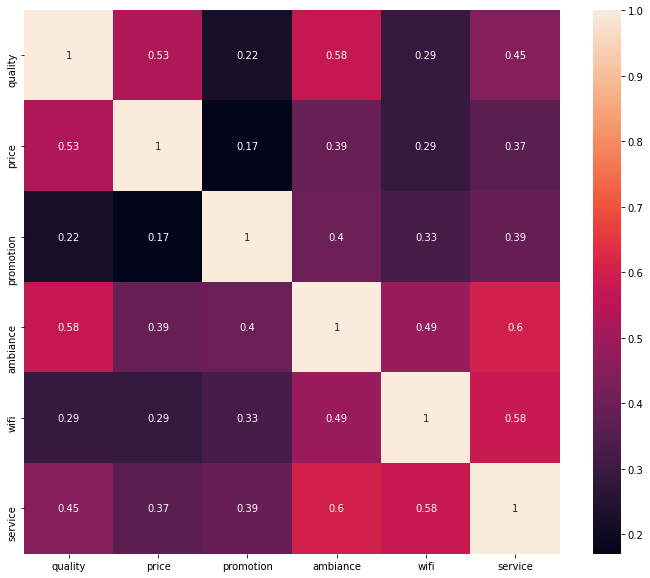

In [269]:
plt.figure(figsize=(12,10))
sns.heatmap(rate.corr(),annot=True)

In [267]:
rate.corr()

,quality,price,promotion,ambiance,wifi,service
quality,1.000000,0.532617,0.222201,0.575164,0.287830,0.451050
price,0.532617,1.000000,0.170491,0.392726,0.289394,0.365881
promotion,0.222201,0.170491,1.000000,0.398178,0.327042,0.389976
ambiance,0.575164,0.392726,0.398178,1.000000,0.488045,0.604545
wifi,0.287830,0.289394,0.327042,0.488045,1.000000,0.581395
service,0.451050,0.365881,0.389976,0.604545,0.581395,1.000000


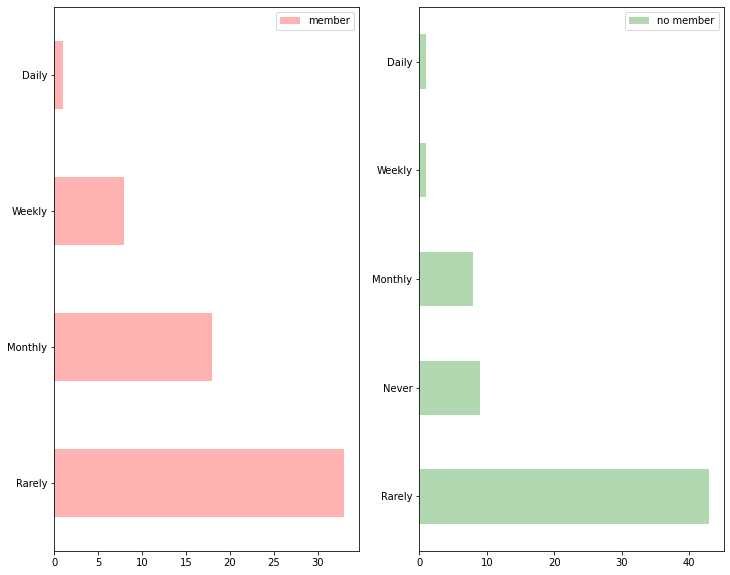

In [295]:
plt.figure(figsize=(15,10))

plt.subplot(121)
df01[df01['9. Do you have Starbucks membership card?']=='Yes']['5. How often do you visit Starbucks?'].value_counts().plot(kind='barh', figsize=(12,10), alpha=0.3, label='member', color='red')
plt.legend()
plt.subplot(122)
df01[df01['9. Do you have Starbucks membership card?']=='No']['5. How often do you visit Starbucks?'].value_counts().plot(kind='barh', figsize=(12,10), alpha=0.3, color='green',label='no member')
plt.legend()

In [278]:
len(df01[df01['9. Do you have Starbucks membership card?']=='Yes'])

60

In [279]:
len(df01[df01['9. Do you have Starbucks membership card?']=='No'])

62

In [282]:
df01[df01['5. How often do you visit Starbucks?']=='Never']

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?,hour
40,2019-10-01 14:03:08-08:00,Female,From 20 to 29,Employed,"RM25,000 - RM50,000",Never,Take away,Below 30 minutes,1km - 3km,No,Coffee,Less than RM20,4,4,4,4,4,4,4,Social Media,Yes,14
44,2019-10-01 14:41:01-08:00,Female,Below 20,Student,"Less than RM25,000",Never,never,Below 30 minutes,1km - 3km,No,Coffee,Zero,3,3,3,3,3,3,3,Social Media,Yes,14
46,2019-10-01 14:41:56-08:00,Female,Below 20,Student,"Less than RM25,000",Never,Dine in,Below 30 minutes,more than 3km,No,Cold drinks,Less than RM20,3,2,5,4,3,3,5,Through friends and word of mouth,Yes,14
67,2019-10-02 19:27:56-08:00,Female,From 20 to 29,Self-employed,"Less than RM25,000",Never,Never buy,Below 30 minutes,more than 3km,No,Never,Zero,3,3,3,3,3,3,3,Never hear,No,19
81,2019-10-03 09:11:28-08:00,Male,From 20 to 29,Employed,"Less than RM25,000",Never,NaN,Below 30 minutes,more than 3km,No,Never buy any,Zero,1,1,1,3,3,3,3,NaN,No,9
92,2019-10-03 13:30:06-08:00,Female,From 20 to 29,Employed,"RM25,000 - RM50,000",Never,Dine in,Below 30 minutes,within 1km,No,Coffee,Zero,3,3,3,3,3,3,3,Social Media,No,13
107,2019-10-03 19:00:47-08:00,Female,Below 20,Student,"Less than RM25,000",Never,Never,Below 30 minutes,more than 3km,No,Cold drinks;Never,Zero,3,2,2,2,3,3,3,Starbucks Website/Apps;Social Media;Through fr...,Yes,19
108,2019-10-03 19:14:53-08:00,Male,From 20 to 29,Student,"Less than RM25,000",Never,never,Below 30 minutes,within 1km,No,never,Zero,3,3,3,1,3,3,4,Through friends and word of mouth,No,19
112,2019-10-03 19:58:17-08:00,Male,From 20 to 29,Student,"More than RM150,000",Never,Never,Below 30 minutes,more than 3km,No,Nothing,Zero,1,1,1,1,1,1,1,Billboards,No,19


In [284]:
df01[df01['9. Do you have Starbucks membership card?']=='Yes']['5. How often do you visit Starbucks?'].value_counts()

Rarely     33
Monthly    18
Weekly      8
Daily       1
Name: 5. How often do you visit Starbucks?, dtype: int64

In [285]:
df01[df01['9. Do you have Starbucks membership card?']=='No']['5. How often do you visit Starbucks?'].value_counts()

Rarely     43
Never       9
Monthly     8
Weekly      1
Daily       1
Name: 5. How often do you visit Starbucks?, dtype: int64